<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_7_SRAL_SHW.ipynb"><< SRAL significant wave height</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-sral/HEAD?urlpath=%2Ftree%2F1_SRAL_introductory%2F1_8_SRAL_WS.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-sral/1_SRAL_introductory/1_8_SRAL_WS.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>    
</html>

<div class="alert alert-block alert-success">
<h3>Learn SRAL: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_SRAL_data_access_Data_Store.ipynb" target="_blank">1_1a_SRAL_data_access_Data_Store.ipynb</a>** if using the Data Store for data access
    <br><br>**OR**<br><br>
  - **<a href="./1_1b_SRAL_data_access_HDA.ipynb" target="_blank">1_1b_SRAL_data_access_HDA.ipynb</a>** if using WEkEO for data access
    
</div>
<hr>

# 1.8 SRAL wind speed 


### Data used

| Product Description  | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-3 SRAL level-2 | EO:EUM:DAT:0415 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SR_2_WAT___NTC?query=SRAL&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SR_2_WAT___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_2_WAT___" target="_blank">link</a>|

### Learning outcomes

At the end of this notebook you will know;
* How to read significant wave height data from Sentinel-3 level-2 altimetry files.
* How plot significant wave height data using appropriate flags.

### Outline

As discussed in the previous notebooks - altimetry measurements contain more information about sea state than just the sea-level. Characteristics of the waveform can be used to estimate other parameters, including wind speed. Backscatter is related to the surface mean square slope (MSS), and thus, to wind speed. Stronger winds result in a higher MSS which is related to smaller backscatter values.

In this notebook, we'll take a look at how to plot this data from a Sentinel-3 altimetry level-2 product.

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Reading SRAL level-2 wind speed data](#section1)
 2. [Plotting SRAL level-2 wind speed data](#section2)


We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import cartopy                       # a library that support mapping
import matplotlib.pyplot as plt      # a library that support plotting
import xarray as xr                  # a library that supports using labelled, multidimensional arrays
import numpy as np                   # a library that provides support for array-based mathematics
import os                            # a library that allows us access to basic operating system commands
import warnings                      # a library that helps us manage warnings
warnings.filterwarnings('ignore')

Lets set a few plot parameters for use throughout this notebook

In [2]:
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Reading SRAL level-2 wind speed data
[Back to top](#TOC-TOP)

</div>

As in the previous notebooks in this series, we will use a Sentinel-3 level-2 altimetry file here. For this instance we only need to open the standard measurement file, as we won't be using the waveforms.

In [3]:
# selecting SAFE directories
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3B_SR_2_WAT____20220218T110400_20220218T115102_20220316T035351_2822_062_365______MAR_O_NT_004.SEN3')
measurement_file = "standard_measurement.nc"

In [4]:
# read data
ds = xr.open_dataset(os.path.join(SAFE_directory, measurement_file))
ds.close()

In preparation for plotting the data, we will also read in the relevant flag information for the significant wave height product. In this case this is the "sig0_ocean_qual_01_ku" - you can see from the name (including 'ku') that we will be using the SWH derived from the SAR mode measurements.

In [5]:
flags_ws = np.array(ds.sig0_ocean_qual_01_ku).astype(float)
flags_ws[flags_ws != 0.0] = 1.2
flags_ws[flags_ws == 0.0] = np.nan

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Plotting SRAL level-2 SWH data
[Back to top](#TOC-TOP)

</div>

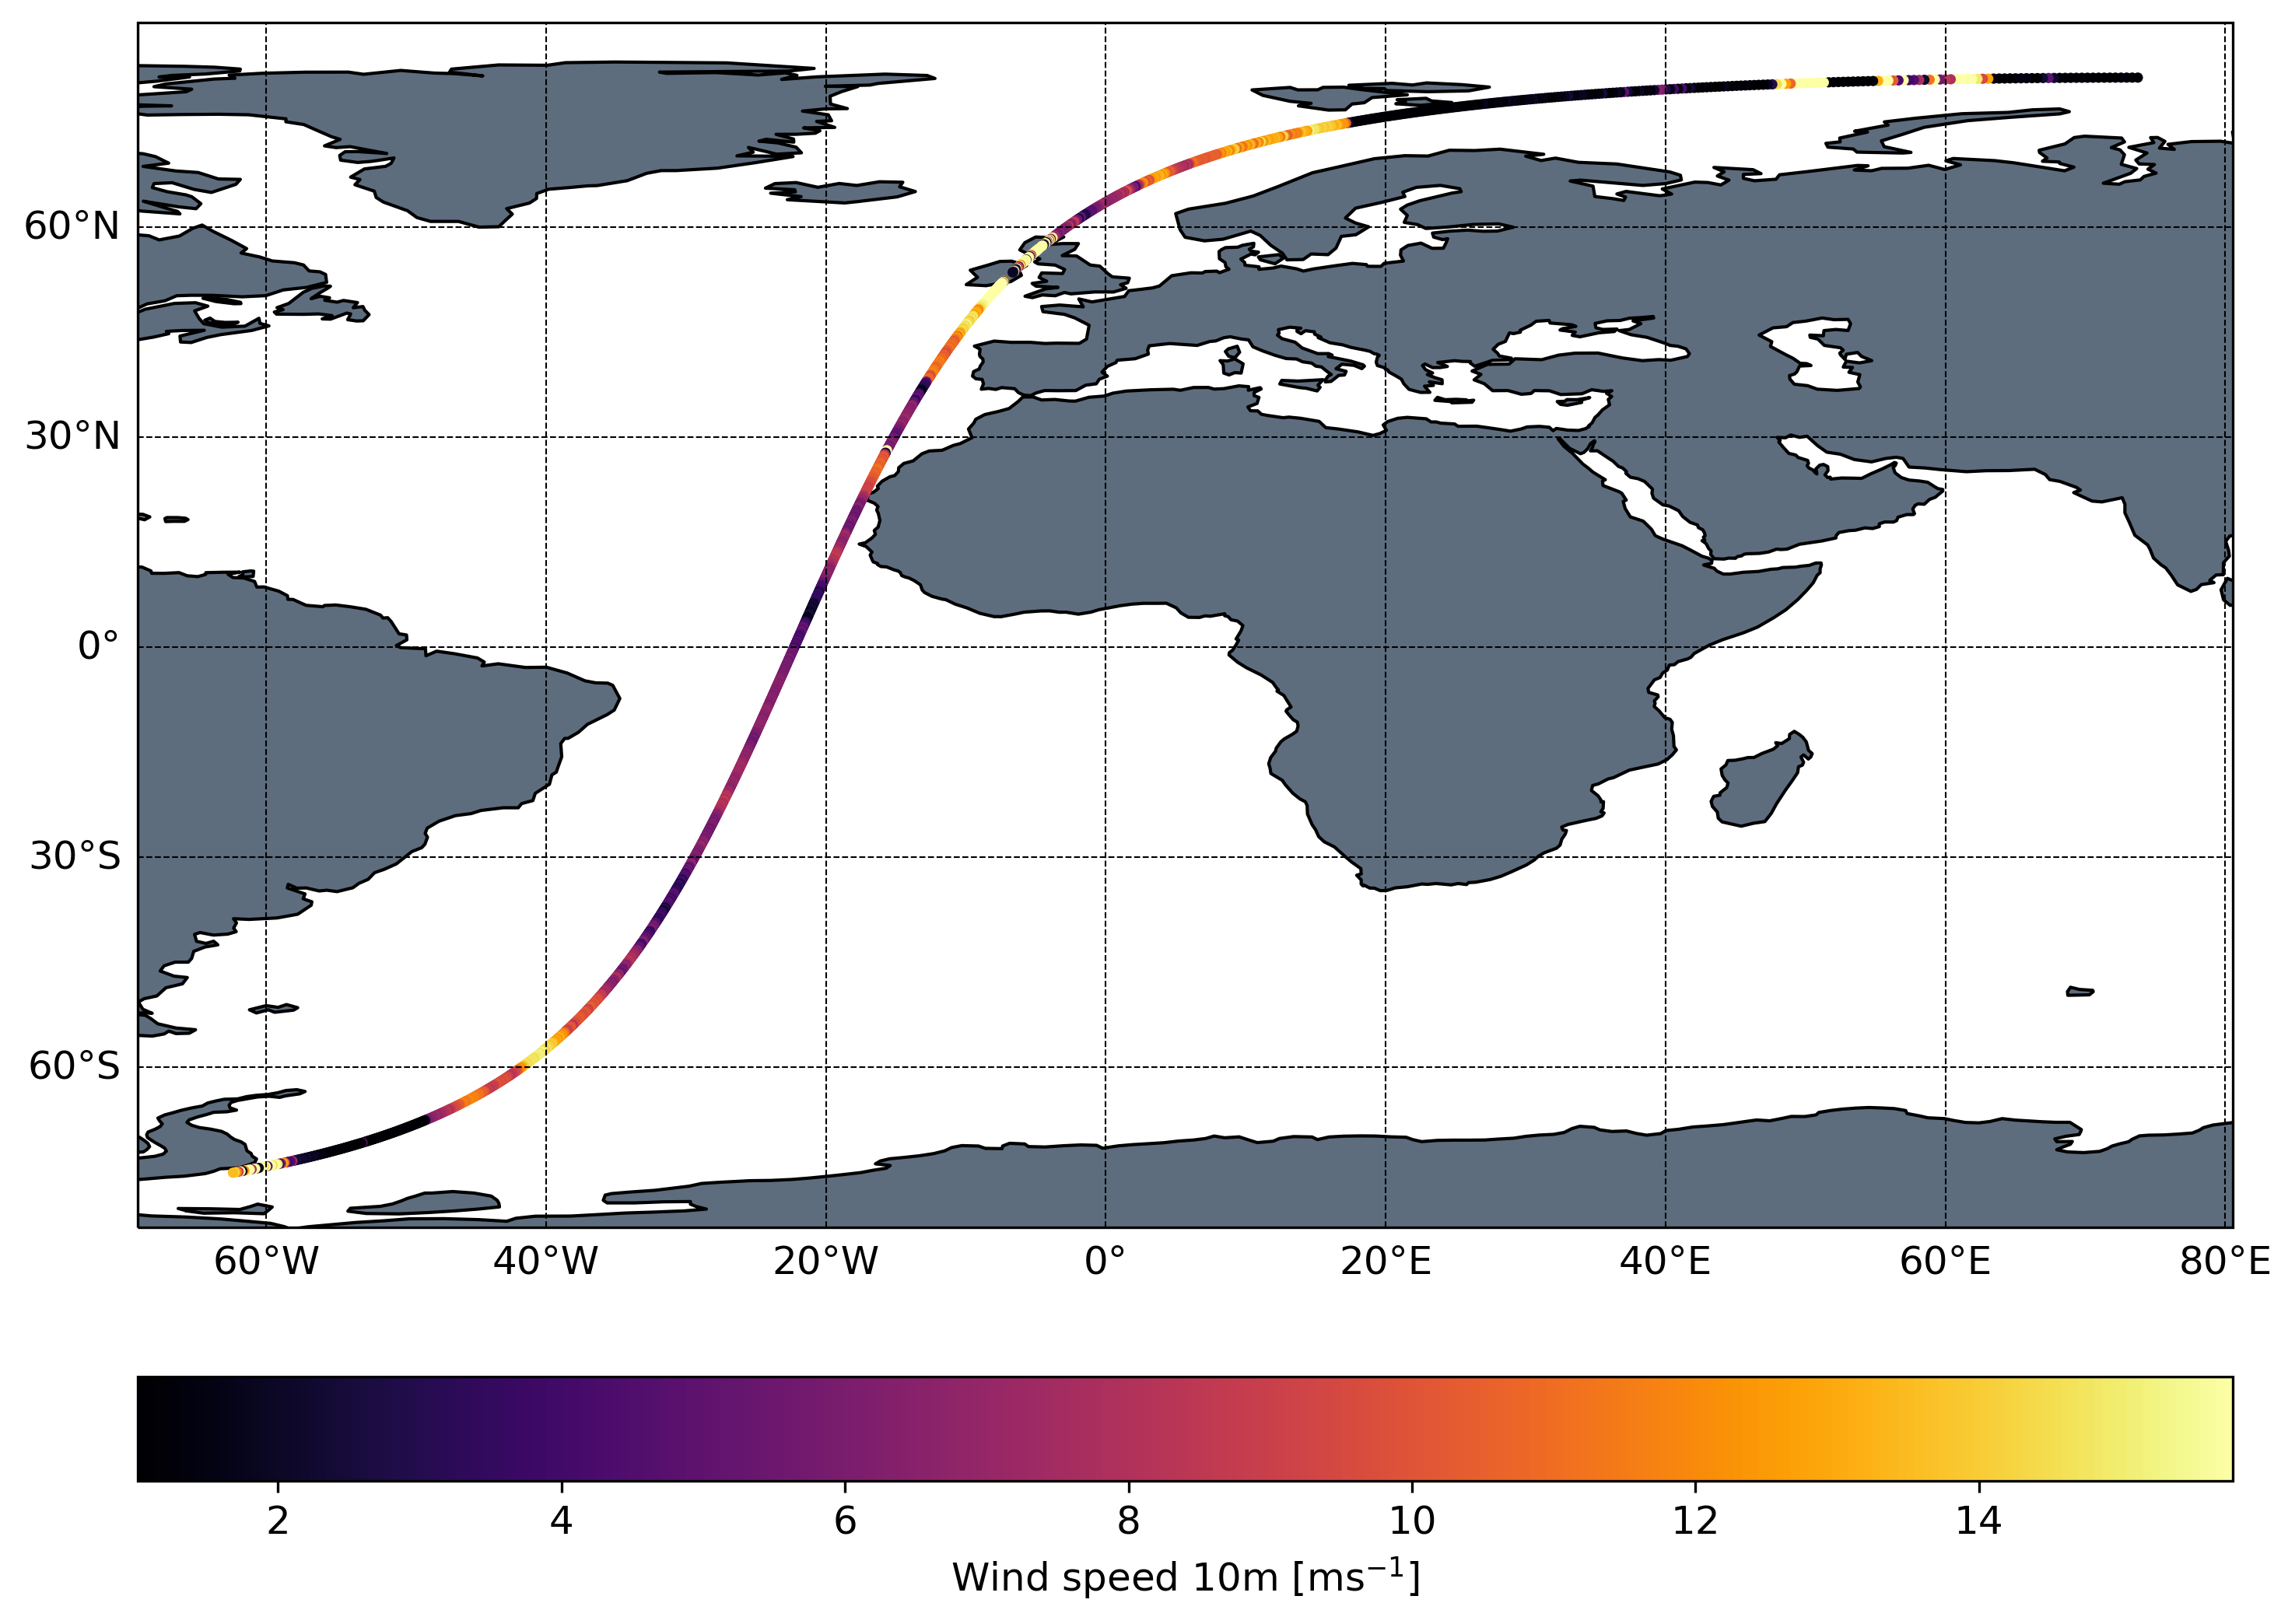

In [6]:
# plot the flagged track data for geophysical variables
fig, m = plt.subplots(1, 1, figsize=(10, 10), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})

labels = ['Wind speed 10m [ms$^{-1}$]']
plot_vars = [ds.wind_speed_alt_01_ku]
plot_flags = [flags_ws]
cmaps = ["inferno"]

init = True
for label, plot_var, plot_flag, cmap in zip(labels, plot_vars, plot_flags, cmaps):

    vmin = np.nanpercentile(plot_var, 5)
    vmax = np.nanpercentile(plot_var, 95)
    plot_var[plot_flag == 0] = np.nan
    f1 = m.scatter(ds.lon_01, ds.lat_01, c=plot_var, s=10, cmap=cmap, marker='o', edgecolors=None, 
                   linewidth=0.0, vmin=vmin, vmax=vmax)

    m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
    g1 = m.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--', linewidth=0.5)
    g1.top_labels = False
    g1.right_labels = False
    g1.xlabel_style = {'color': 'black'}
    g1.ylabel_style = {'color': 'black'}
    m.set(facecolor = "1.0")
    m.set_aspect(0.5)
    
    cbar = plt.colorbar(f1, ax=m, orientation="horizontal", fraction=0.05, pad=0.07)
    cbar.set_label(label)

plt.tight_layout()
plt.savefig('1_8_SRAL_WS.png')

The figure shows the variability in wind speed along the same track as looked at in the previous notebook. Again you can see high values in the windspeed (as with the SWH) in areas around the UK and France, and Southern Ocean. However you can also see other regions of variability, such as around the upwelling systems in North-West Africa.

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_7_SRAL_SHW.ipynb"><< SRAL significant wave height</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>